<a href="https://colab.research.google.com/github/fire-long/24-1DeepLearning/blob/main/Assignment1_ANN%26Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 실습 과제 1
Lab 0 Broadcasting: Multiply a tensor by a set of constants에서 multiplication 예제를 addition으로 수정하세요.

In [ ]:
import torch

In [ ]:
x = torch.tensor([[1, 2, 3], [4, 5, 6]])  # x has shape (2, 3)
c = torch.tensor([1, 10, 11, 100])        # c has shape (4)
print('Here is the matrix:')
print(x)
print('\nHere is the vector:')
print(c)

y = c.view(4, 1, 1) + x.view(1,2,3)
print('\nAdd x by a set of constants:')
print(y)

Here is the matrix:
tensor([[1, 2, 3],
        [4, 5, 6]])

Here is the vector:
tensor([  1,  10,  11, 100])

Add x by a set of constants:
tensor([[[  2,   3,   4],
         [  5,   6,   7]],

        [[ 11,  12,  13],
         [ 14,  15,  16]],

        [[ 12,  13,  14],
         [ 15,  16,  17]],

        [[101, 102, 103],
         [104, 105, 106]]])


# 실습과제 2
Lab 1 Universal Approximation Theorem에서 L2대신 L1 regularization으로 학습시키고 결과를 비교 논의하세요.

## Neural Network 정의

In [ ]:
# Re-importing necessary libraries and re-defining classes and functions after reset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.relu(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

## L2로의 결과

In [ ]:
def train_model_with_regularization(model, criterion, optimizer, x, y, epochs=2000, weight_decay=0.01):
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # L2 Regularization is automatically applied through optimizer's weight_decay parameter
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

In [ ]:
# Model without regularization
model_no_reg = NetWithActivations(hidden_size=50)
optimizer_no_reg = torch.optim.Adam(model_no_reg.parameters(), lr=0.01)
train_model_with_regularization(model_no_reg, criterion, optimizer_no_reg, x, y, epochs=2000, weight_decay=0)

# Model with regularization
model_with_reg = NetWithActivations(hidden_size=50)
optimizer_with_reg = torch.optim.Adam(model_with_reg.parameters(), lr=0.01, weight_decay=0.01)  # Including L2 regularization
train_model_with_regularization(model_with_reg, criterion, optimizer_with_reg, x, y, epochs=2000, weight_decay=0.01)

Epoch [100/2000], Loss: 0.0034
Epoch [200/2000], Loss: 0.0003
Epoch [300/2000], Loss: 0.0001
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0000
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0001
Epoch [1600/2000], Loss: 0.0000
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000
Epoch [100/2000], Loss: 0.0120
Epoch [200/2000], Loss: 0.0094
Epoch [300/2000], Loss: 0.0088
Epoch [400/2000], Loss: 0.0086
Epoch [500/2000], Loss: 0.0086
Epoch [600/2000], Loss: 0.0086
Epoch [700/2000], Loss: 0.0086
Epoch [800/2000], Loss: 0.0086
Epoch [900/2000], Loss: 0.0086
Epoch [1000/2000], Loss: 0.0086
Epoch [1100/2000], Loss: 0.0086
Epoch [1200/2000], Loss: 0

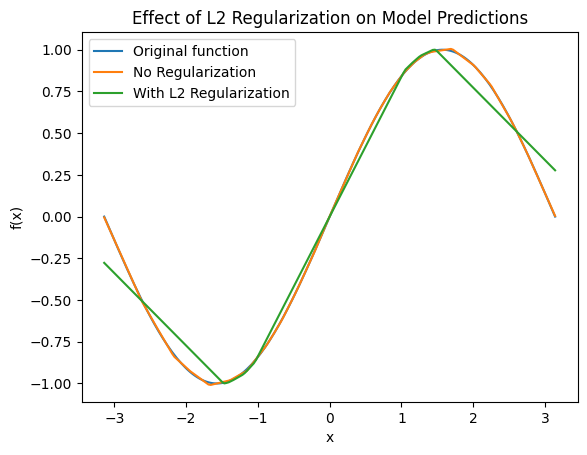

In [ ]:
with torch.no_grad():
    predictions_no_reg = model_no_reg(x).detach().numpy()
    predictions_with_reg = model_with_reg(x).detach().numpy()

plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
plt.plot(x.numpy(), predictions_with_reg, label='With L2 Regularization')
plt.legend()
plt.title('Effect of L2 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

## L1로의 결과

Epoch [100/2000], Loss: 0.0013
Epoch [200/2000], Loss: 0.0002
Epoch [300/2000], Loss: 0.0001
Epoch [400/2000], Loss: 0.0000
Epoch [500/2000], Loss: 0.0000
Epoch [600/2000], Loss: 0.0000
Epoch [700/2000], Loss: 0.0000
Epoch [800/2000], Loss: 0.0000
Epoch [900/2000], Loss: 0.0000
Epoch [1000/2000], Loss: 0.0000
Epoch [1100/2000], Loss: 0.0000
Epoch [1200/2000], Loss: 0.0000
Epoch [1300/2000], Loss: 0.0000
Epoch [1400/2000], Loss: 0.0000
Epoch [1500/2000], Loss: 0.0000
Epoch [1600/2000], Loss: 0.0005
Epoch [1700/2000], Loss: 0.0000
Epoch [1800/2000], Loss: 0.0000
Epoch [1900/2000], Loss: 0.0000
Epoch [2000/2000], Loss: 0.0000


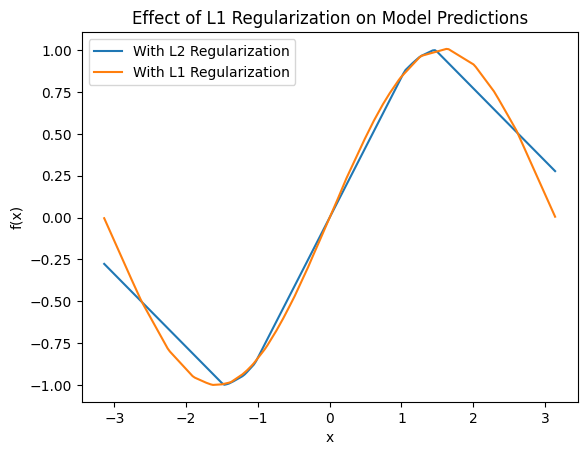

In [ ]:
def train_model_with_l1_regularization(model, criterion, optimizer, x, y, epochs=2000, weight_decay=0.01):
    for epoch in range(epochs):
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # Calculate the L1 regularization term
        l1_regularization = 0
        for param in model.parameters():
            l1_regularization += torch.sum(torch.abs(param))

        # Add the L1 regularization term to the loss
        loss += weight_decay * l1_regularization

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if (epoch+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')
model_with_reg2 = NetWithActivations(hidden_size=50)
optimizer_with_reg2 = torch.optim.Adam(model_with_reg2.parameters(), lr=0.01)
train_model_with_l1_regularization(model_with_reg2, criterion, optimizer_with_reg2, x, y, epochs=2000, weight_decay=0)

with torch.no_grad():
    predictions_with_reg = model_with_reg(x).detach().numpy()
    predictions_with_reg2 = model_with_reg2(x).detach().numpy()


plt.plot(x.numpy(), predictions_with_reg, label='With L2 Regularization')
plt.plot(x.numpy(), predictions_with_reg2, label='With L1 Regularization')

plt.legend()
plt.title('Effect of L1 Regularization on Model Predictions')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

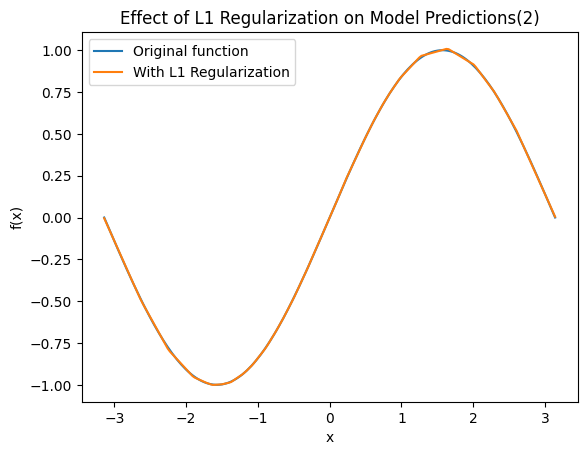

In [ ]:
plt.plot(x.numpy(), y.numpy(), label='Original function')
#plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
#plt.plot(x.numpy(), predictions_with_reg, label='With L2 Regularization')
plt.plot(x.numpy(), predictions_with_reg2, label='With L1 Regularization')

plt.legend()
plt.title('Effect of L1 Regularization on Model Predictions(2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

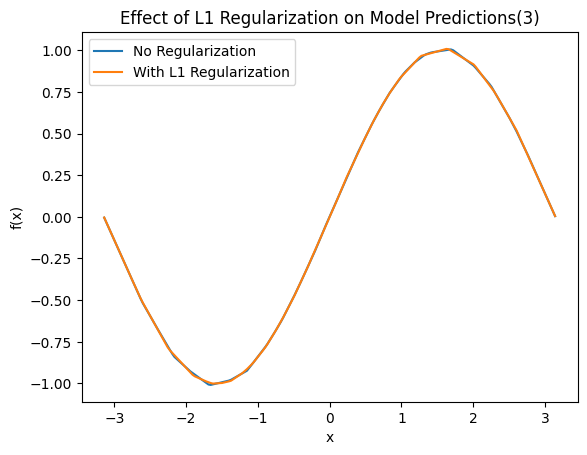

In [ ]:
#plt.plot(x.numpy(), y.numpy(), label='Original function')
plt.plot(x.numpy(), predictions_no_reg, label='No Regularization')
#plt.plot(x.numpy(), predictions_with_reg, label='With L2 Regularization')
plt.plot(x.numpy(), predictions_with_reg2, label='With L1 Regularization')

plt.legend()
plt.title('Effect of L1 Regularization on Model Predictions(3)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# 실습과제 3
Lab 1 Universal Approximation Theorem에서 ReLU이외의 다른 activation function으로 학습시켜보고 결과를 논의하세요.

## relu&sigmoid

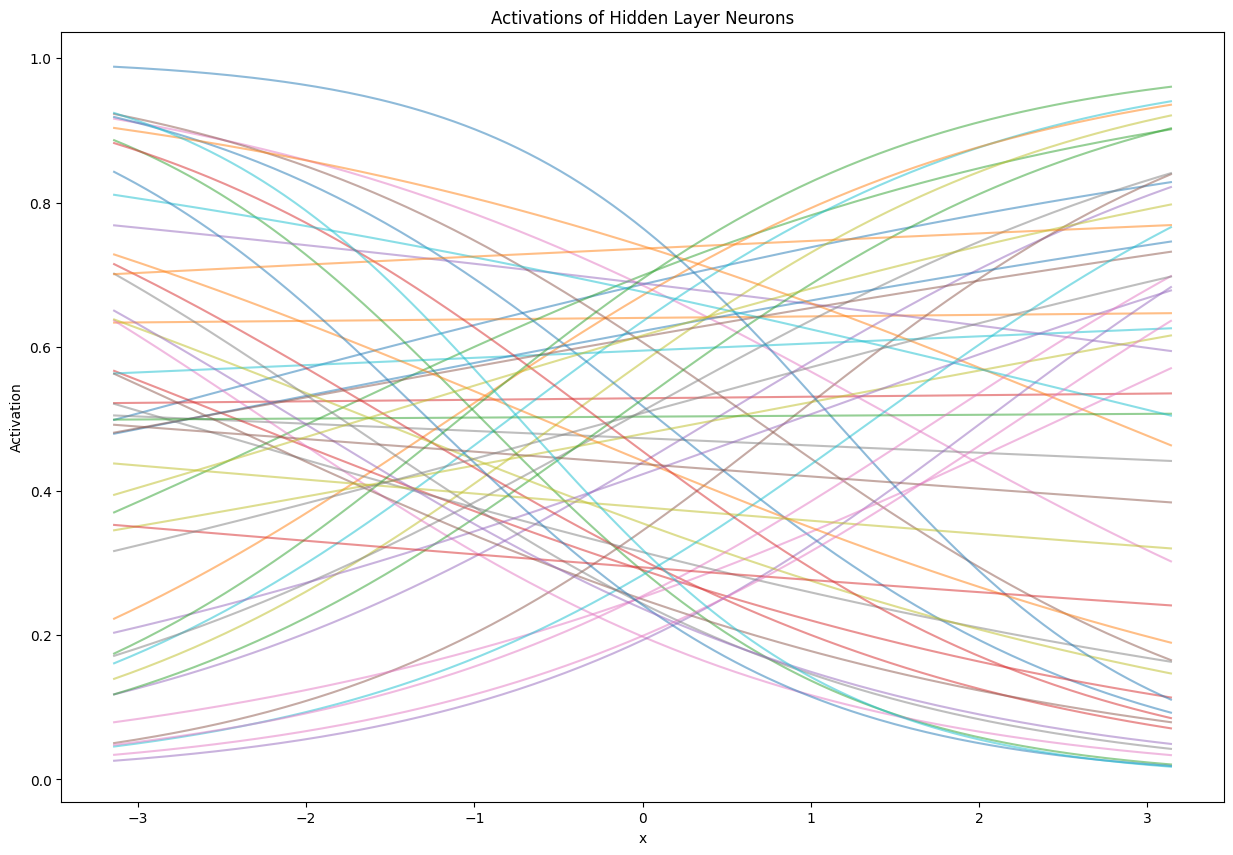

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.sigmoid(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()

## relu&tanh

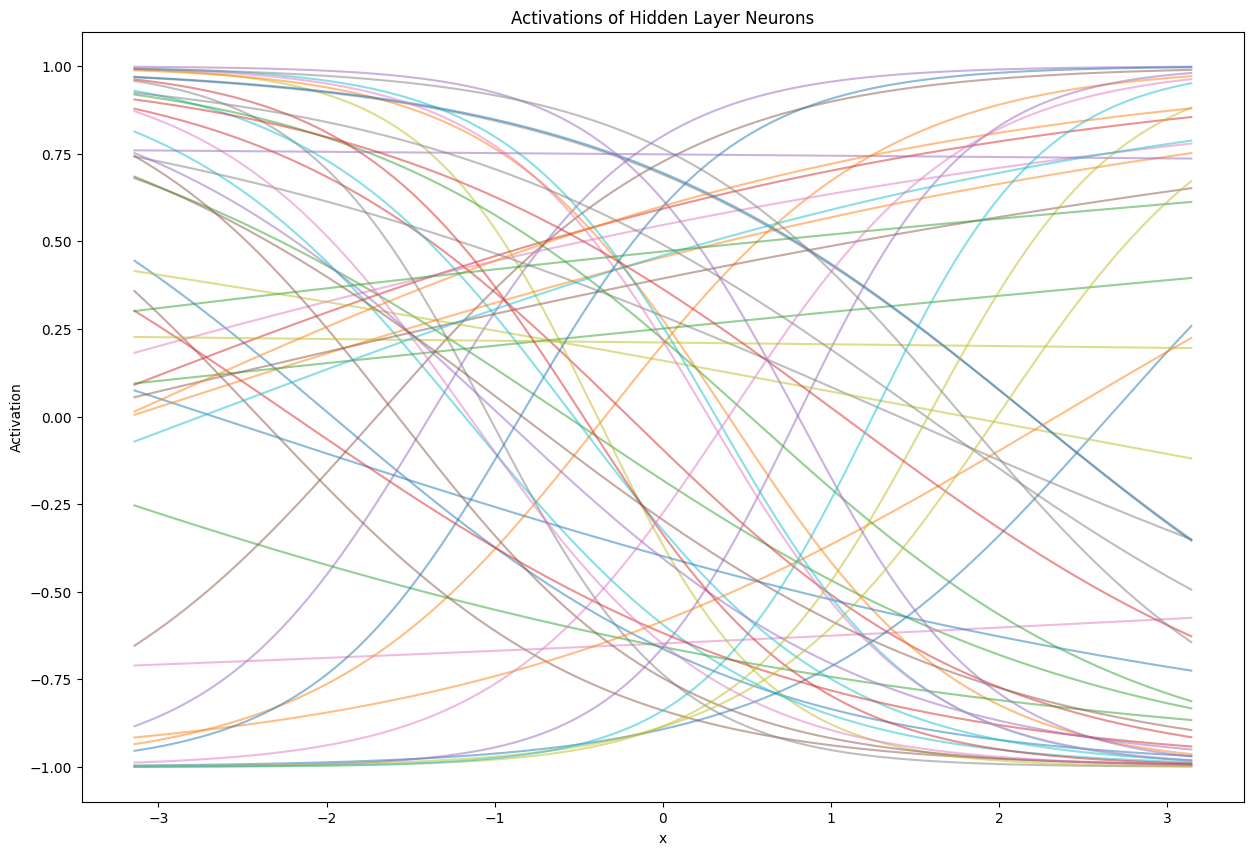

In [ ]:
# Re-importing necessary libraries and re-defining classes and functions after reset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.tanh(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()

## relu&LeakyReLU

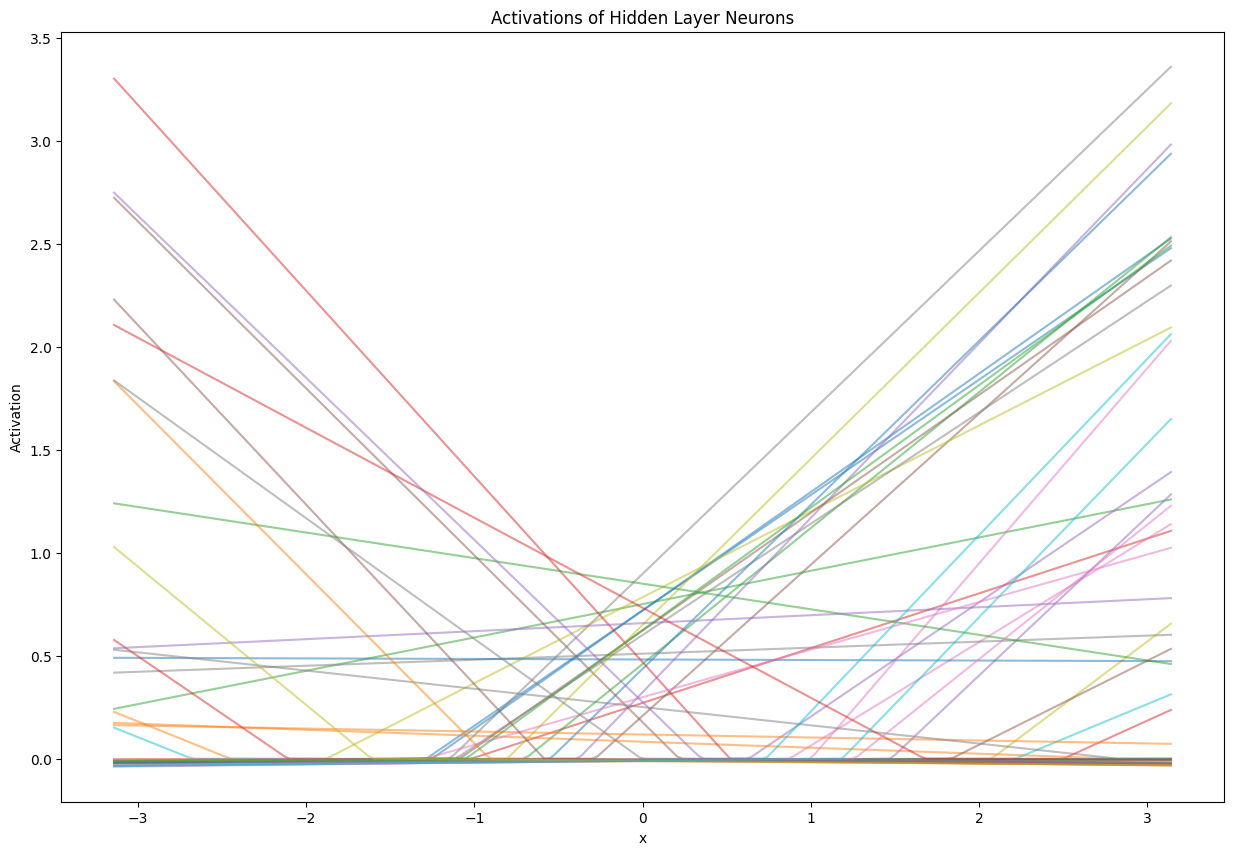

In [ ]:
# Re-importing necessary libraries and re-defining classes and functions after reset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = nn.LeakyReLU()(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()

## sigmoid&sigmoid

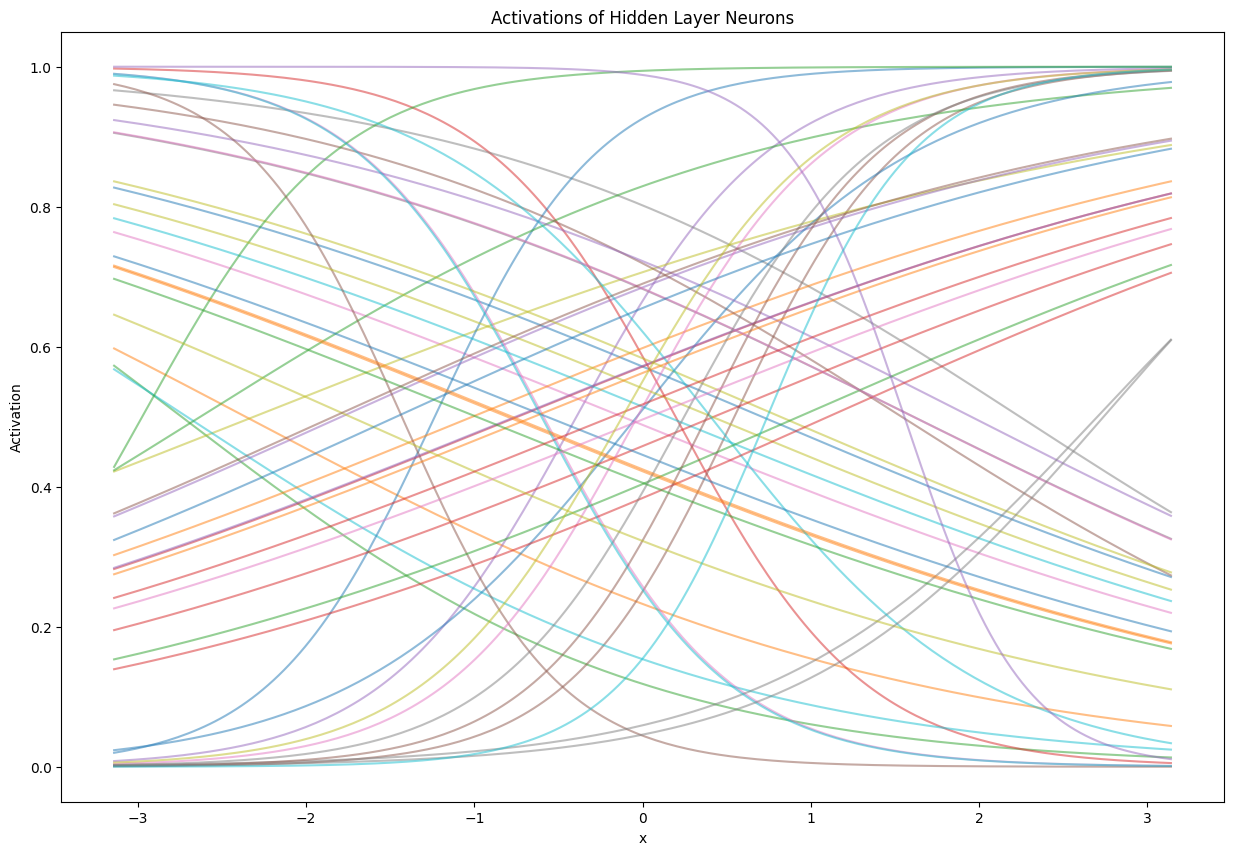

In [ ]:
# Re-importing necessary libraries and re-defining classes and functions after reset
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# Data generation
x = torch.linspace(-np.pi, np.pi, 200).view(-1, 1)

# Original neural network definition for reference
class Net(nn.Module):
    def __init__(self, hidden_size):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)  # Input to hidden layer
        self.fc2 = nn.Linear(hidden_size, 1)  # Hidden to output layer

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = self.fc2(x)
        return x

# Modified neural network definition for activation extraction
class NetWithActivations(Net):
    def __init__(self, hidden_size):
        super(NetWithActivations, self).__init__(hidden_size)

    def forward_with_activations(self, x):
        activations = torch.sigmoid(self.fc1(x))
        output = self.fc2(activations)
        return output, activations

# Training setup
model = Net(hidden_size=50)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
y = torch.sin(x)
epochs = 2000
for epoch in range(epochs):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Extract activations
model_with_activations = NetWithActivations(hidden_size=50)
model_with_activations.load_state_dict(model.state_dict())

with torch.no_grad():
    _, activations = model_with_activations.forward_with_activations(x)

# Visualizing activations
plt.figure(figsize=(15, 10))
for i in range(activations.size(1)):  # For each neuron in the hidden layer
    plt.plot(x.numpy(), activations[:, i].numpy(), alpha=0.5)

plt.title('Activations of Hidden Layer Neurons')
plt.xlabel('x')
plt.ylabel('Activation')
plt.show()

# 실습과제 4
Lab 1 ANN for MNIST에서 모델을 hinge loss(SVM loss)로 학습시켜보고 결과를 논의하세요.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 100)  # First layer (input to hidden)
        self.fc2 = nn.Linear(100, 10)     # Second layer (hidden to output)

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the image
        x = torch.relu(self.fc1(x))  # ReLU activation function
        x = self.fc2(x)  # No activation, output raw scores
        return x

# Training with Hinge(SVM) Loss
print("Training with Hinge Loss:")
model = MLP()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

def hinge_loss(outputs, targets, delta=1.0):
  num_classes = outputs.size(1)
  correct_scores = outputs[range(len(outputs)), targets].unsqueeze(1)
  margins = torch.clamp(outputs - correct_scores + delta, min = 0)
  margins[range(len(outputs)), targets]=0
  loss = margins.mean()
  return loss

epochs = 10  # Run for 10 epochs
# Training loop
model.train()
for epoch in range(epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = hinge_loss(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')#Accuracy: 97.59%

100%|██████████| 9912422/9912422 [00:00<00:00, 144362614.78it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 94415973.36it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 37866039.92it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16963961.50it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Training with Hinge Loss:
Epoch 1, Loss: 0.0014964796137064695
Epoch 2, Loss: 0.010508958250284195
Epoch 3, Loss: 0.002078376244753599
Epoch 4, Loss: 0.008278082124888897
Epoch 5, Loss: 0.009544508531689644
Epoch 6, Loss: 0.009921109303832054
Epoch 7, Loss: 9.900741133606061e-05
Epoch 8, Loss: 0.007411385886371136
Epoch 9, Loss: 0.01070000696927309
Epoch 10, Loss: 0.0009620115160942078
Accuracy: 97.59%


# 실습과제 5
Lab 1 ANN for MNIST에서 모델을 nn module이 아닌 barebone function만으로 같은 기능을 구현하세요

In [ ]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Transformations applied on each image
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])

# Loading the MNIST dataset
train_dataset = datasets.MNIST('./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

# Define the forward pass as a function
def mlp_forward(x, fc1_weights, fc1_bias, fc2_weights, fc2_bias):
    x = x.view(-1, 28 * 28)  # Flatten the image
    x = F.relu(F.linear(x, fc1_weights.t(), fc1_bias))  # ReLU activation function
    x = F.linear(x, fc2_weights.t(), fc2_bias)  # No activation, output raw scores
    return x

# Initialize weights and biases
fc1_weights = torch.randn(28 * 28, 100, requires_grad=True)
fc1_bias = torch.randn(100, requires_grad=True)
fc2_weights = torch.randn(100, 10, requires_grad=True)
fc2_bias = torch.randn(10, requires_grad=True)

# Training with Cross Entropy Loss
print("Training with Cross Entropy Loss:")
optimizer = optim.SGD([fc1_weights, fc1_bias, fc2_weights, fc2_bias], lr=0.01, momentum=0.9)
loss_fn = nn.CrossEntropyLoss()
epochs = 10  # Run for 10 epochs

# Training loop
for epoch in range(epochs):
    for data, target in train_loader:
        optimizer.zero_grad()
        output = mlp_forward(data, fc1_weights, fc1_bias, fc2_weights, fc2_bias)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}, Loss: {loss.item()}')

# Evaluation loop
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = mlp_forward(data, fc1_weights, fc1_bias, fc2_weights, fc2_bias)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
accuracy = 100. * correct / len(test_loader.dataset)
print(f'Accuracy: {accuracy}%')#Accuracy: 90.98%

Training with Cross Entropy Loss:
Epoch 1, Loss: 0.6515935063362122
Epoch 2, Loss: 3.6163203716278076
Epoch 3, Loss: 0.20167547464370728
Epoch 4, Loss: 1.3403817415237427
Epoch 5, Loss: 0.16663971543312073
Epoch 6, Loss: 2.346466541290283
Epoch 7, Loss: 0.33026817440986633
Epoch 8, Loss: 0.685500979423523
Epoch 9, Loss: 0.0829586386680603
Epoch 10, Loss: 0.14885786175727844
Accuracy: 90.98%


# 실습과제 6
다음 x와 w의 matrix multiplication을 수행하고자 할 때, GPU 사용과 CPU 사용시 수행시간을 비교하세요

In [ ]:
import torch
import time

x = torch.rand(512, 4096)
w = torch.rand(4096, 4096)

In [ ]:
#CPU computation
start_time_cpu = time.time()
result_cpu = torch.matmul(x,w)
end_time_cpu = time.time()
cpu_time = end_time_cpu - start_time_cpu
print("Time taken for matrix multiplication on CPU:", cpu_time)#Time taken for matrix multiplication on CPU: 0.29229044914245605

Time taken for matrix multiplication on CPU: 0.29229044914245605


In [ ]:
# GPU computation (if available)
if torch.cuda.is_available():
    device = torch.device("cuda")  # Use GPU
    x = x.to(device)
    w = w.to(device)

    start_time_gpu = time.time()
    result_gpu = torch.matmul(x, w)
    torch.cuda.synchronize()  # Wait for GPU computations to finish
    end_time_gpu = time.time()
    gpu_time = end_time_gpu - start_time_gpu
    print("Time taken for matrix multiplication on GPU:", gpu_time) #Time taken for matrix multiplication on GPU: 0.12275171279907227
else:
    print("GPU is not available.")

Time taken for matrix multiplication on GPU: 0.12275171279907227


# 실습 과제 7
수업에서 설명한 Logistic Regression(Linear Classifier)과 ANN으로 각각 CIFAR10 데이터를 학습시키고 이미지와 곱해지는 weight들을 이미지 형태로 시각화하여 비교하세요.

In [13]:
import torch.nn as nn
import torch.nn.functional as F

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transformations applied on each image
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize for CIFAR-10
])

# Loading the CIFAR10 dataset
train_dataset = datasets.CIFAR10('./data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./data', train=False, transform=transform)

# Data loaders for the training and test set
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1000, shuffle=False)

class LogisticRegression(nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(32*32*3, 10)  # 32x32x3 이미지를 1차원 벡터로 flatten

        # Xavier weight initialization
        nn.init.xavier_uniform_(self.linear.weight)
        # Bias initialization to zero
        nn.init.constant_(self.linear.bias, 0)

    def forward(self, x):
        x = x.view(-1, 32*32*3)  # 이미지 데이터를 1차원 벡터로 flatten
        x = self.linear(x)
        return x

class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  # 3 input channels, 6 output channels, 5x5 kernel
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)


        # Xavier weight initialization for all layers
        nn.init.xavier_uniform_(self.conv1.weight)
        nn.init.xavier_uniform_(self.conv2.weight)
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

        # Bias initialization to zero for all layers
        nn.init.constant_(self.conv1.bias, 0)
        nn.init.constant_(self.conv2.bias, 0)
        nn.init.constant_(self.fc1.bias, 0)
        nn.init.constant_(self.fc2.bias, 0)
        nn.init.constant_(self.fc3.bias, 0)
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 학습
lr_model = LogisticRegression()
ann_model = ANN()

lr_optimizer = optim.SGD(lr_model.parameters(), lr=0.01, momentum=0.9)
ann_optimizer = optim.SGD(ann_model.parameters(), lr=0.01, momentum=0.9)
#lr_optimizer = optim.Adam(lr_model.parameters(), lr=0.001)
#ann_optimizer = optim.Adam(ann_model.parameters(), lr=0.001)

loss_fn = nn.CrossEntropyLoss()

epochs = 10  # Run for 10 epochs

lr_model.train()
ann_model.train()

# Training loop

for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
      lr_optimizer.zero_grad()
      output = lr_model(data)
      loss = loss_fn(output, target)
      loss.backward()
      lr_optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")
for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
      ann_optimizer.zero_grad()
      output = ann_model(data)
      loss = loss_fn(output, target)
      loss.backward()
      ann_optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")
# Evalutaion loop
lr_model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = lr_model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'lr_model Accuracy: {accuracy}%')#lr_model Accuracy with SGD without xavier: 35.0%
#lr_model Accuracy with SGD and xavier : 35.81%
ann_model.eval()
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = ann_model(data)
        pred = output.argmax(dim=1, keepdim=True)  # Get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()

accuracy = 100. * correct / len(test_loader.dataset)
print(f'ann_model Accuracy: {accuracy}%')# ann_model Accuracy with SGD without xavier: 62.87%
#ann_model Accuracy with SGD and xavier : 63.66%
#SGD 대신 adam 사용 시에는 더 하락

Files already downloaded and verified
Epoch 1, Loss: 2.045729637145996
Epoch 2, Loss: 1.7648751735687256
Epoch 3, Loss: 1.9636152982711792
Epoch 4, Loss: 1.712062120437622
Epoch 5, Loss: 2.418281078338623
Epoch 6, Loss: 1.9134724140167236
Epoch 7, Loss: 2.2370545864105225
Epoch 8, Loss: 1.8395721912384033
Epoch 9, Loss: 2.1616764068603516
Epoch 10, Loss: 1.8360008001327515
Epoch 1, Loss: 1.7011792659759521
Epoch 2, Loss: 0.865867018699646
Epoch 3, Loss: 1.4900950193405151
Epoch 4, Loss: 0.9535448551177979
Epoch 5, Loss: 0.8542349338531494
Epoch 6, Loss: 1.4211468696594238
Epoch 7, Loss: 0.8328284621238708
Epoch 8, Loss: 0.6834312081336975
Epoch 9, Loss: 1.083333969116211
Epoch 10, Loss: 0.8556843996047974
lr_model Accuracy: 35.81%
ann_model Accuracy: 63.66%


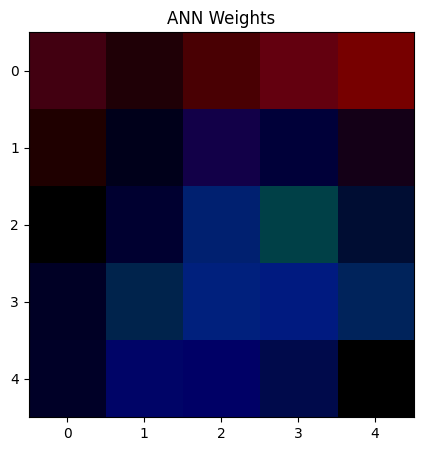

In [14]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# 가중치 시각화
weights = ann_model.conv1.weight.detach().numpy()
weights = weights.transpose(0, 2, 3, 1)
weights = weights.reshape(-1, 5, 5, 3)

#밝기 조절을 위한 상수
brightness_factor = 1.0

#밝기 조절
brightened_weights = weights * brightness_factor

plt.figure(figsize=(10, 5))
plt.title("ANN Weights")
plt.imshow(brightened_weights[0], cmap='gray')
plt.show()

In [15]:
weights.shape

(6, 5, 5, 3)

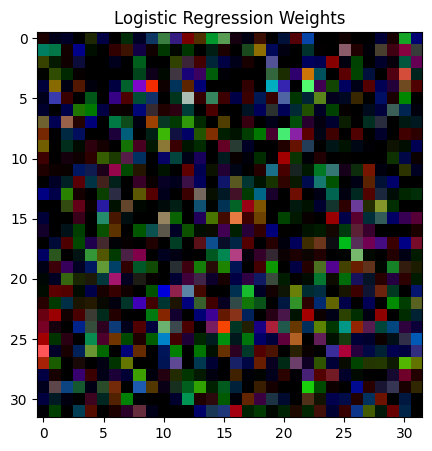

In [16]:
weights = lr_model.linear.weight.detach().numpy()
weights = weights.reshape(10, 32, 32, 3)  # 32x32x3 이미지 형태로 변환

#밝기 조절을 위한 상수
brightness_factor = 5.0

#밝기 조절
brightened_weights = weights * brightness_factor

plt.figure(figsize=(10, 5))
plt.title("Logistic Regression Weights")
plt.imshow(brightened_weights[0], cmap='gray')  # 첫 번째 클래스의 가중치 이미지
plt.show()

In [17]:
weights.shape

(10, 32, 32, 3)